<a href="https://colab.research.google.com/github/Ashokpulipati/News-Classification-Project/blob/main/news_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def Loaddataset():
  from google.colab import files
  uploaded=files.upload()
Loaddataset()

Saving finaldataset.txt to finaldataset (1).txt


In [ ]:
df=pd.read_csv('finaldataset.txt')

In [ ]:
df.head()

,Unnamed: 0,News,Category
0,0,Exclusive: Indian antitrust watchdog raids Gle...,Business
1,1,Amazon's second headquarters faces new blocks ...,Business
2,2,Phillips 66 contains fire at its Los Angeles r...,Business
3,3,"BMW, Mercedes-Benz lower prices in China after...",Business
4,4,Motor racing: McLaren extend F1 partnership wi...,Business


In [ ]:
df.shape

(38370, 3)

In [ ]:
df['Category'].value_counts()

Business    19970
Sport        9540
Tech         8860
Name: Category, dtype: int64

In [ ]:
del df['Unnamed: 0']

In [ ]:
df1=df.copy()


In [ ]:
df=df1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


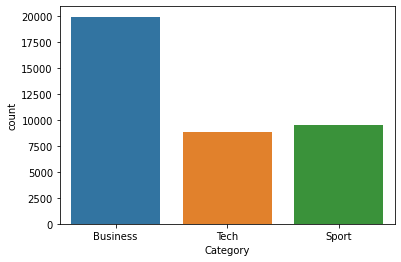

In [ ]:
import seaborn as sns
sns.countplot(df.Category)

In [ ]:
df.head()

,News,Category
0,Exclusive: Indian antitrust watchdog raids Gle...,Business
1,Amazon's second headquarters faces new blocks ...,Business
2,Phillips 66 contains fire at its Los Angeles r...,Business
3,"BMW, Mercedes-Benz lower prices in China after...",Business
4,Motor racing: McLaren extend F1 partnership wi...,Business


In [ ]:
df.tail()

,News,Category
38365,Golf: Oosthuizen romps to maiden South African...,Sport
38366,Afghanistan suspends officials after women's f...,Sport
38367,Swimming: Top swimmers challenge FINA with law...,Sport
38368,Cricket: India close in on victory after Austr...,Sport
38369,Cricket: Spin conundrum for New Zealand ahead ...,Sport


In [ ]:
df.sample(5)

,News,Category
19002,Rail Vikas Nigam IPO fully subscribed,Business
37768,"Tennis: Federer, Serena click 'greatest selfie...",Sport
16381,Exclusive: Elliott Management opposes airline ...,Business
5128,"Nissan finds more improper testing, considers ...",Business
22909,"Google, Facebook, Twitter fail to live up to f...",Tech


In [ ]:
df.shape

(38370, 2)

In [ ]:
data=df['News']

In [ ]:
target=df['Category']

In [ ]:
def preprocess(target):
  from sklearn.preprocessing import LabelEncoder
  le=LabelEncoder()
  target=le.fit_transform(target)
  le.inverse_transform([0,1,2])
preprocess(target)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(data,target,test_size=0.3,random_state=42)

In [ ]:
len(xtrain)

26859

In [ ]:
xtrain.shape

(26859,)

In [ ]:
len(ytrain)

26859

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer =TfidfVectorizer(stop_words='english',ngram_range=(1,2))
xtrain = vectorizer.fit_transform(xtrain)
xtest = vectorizer.transform(xtest)
#print(train_vectors.shape, test_vectors.shape)

In [ ]:
xtrain.shape

(26859, 148907)

In [ ]:
xtest.shape

(11511, 148907)

In [ ]:
ytrain.shape

(26859,)

In [ ]:
ytrain

35501       Sport
6020     Business
29035       Sport
21643        Tech
10822    Business
           ...   
6265     Business
11284    Business
38158       Sport
860      Business
15795    Business
Name: Category, Length: 26859, dtype: object

In [ ]:
def SVM(xtest,ytest,xtrain,ytrain):
  clf = svm.SVC(C=1,kernel='linear')
  clf.fit(xtrain,ytrain)
  pred=clf.predict(xtest)
  acc=accuracy_score(ytest,pred)
  print(acc)
  print(confusion_matrix(ytest,pred))
  return clf
clf=SVM(xtest,ytest,xtrain,ytrain)

0.8339848840239771
[[5067   22  886]
 [  91 2756   11]
 [ 878   23 1777]]


Checking the model with my own random inputs.

---



In [ ]:
new4=['2019 World Cup | Rain takes over after Williamson and Taylor lead New Zealands fightback']
new4=vectorizer.transform(new4)
p=clf.predict(new4.todense())
if(p==0):
  print("Business")
elif(p==1):
  print("Sports")
elif(p==2):
  print("Tech")
print(p)

['Sport']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


0=Business
1=Sport
2=Tech

In [ ]:
new=['Bharti Airtel users consume about 11GB data per month; overtake Reliance JioNEWS Bharti Airtel users consume about 11GB data per month; overtake Reliance Jio']
new=vectorizer.transform(new)
p=clf.predict(new.todense())
if(p==0):
  print("Business")
elif(p==1):
  print("Sports")
elif(p==2):
  print("Tech")
print(p)


['Business']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
new=['Xiaomi, Samsung dont target undecided smartphone buyers']
new=vectorizer.transform(new)
p=clf.predict(new.todense())
if(p==0):
  print("Business")
elif(p==1):
  print("Sports")
elif(p==2):
  print("Tech")
print(p)


['Tech']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
new4=['Sensex drops over 250 points; TCS down 2%']
new4=vectorizer.transform(new4)
p=clf.predict(new4.todense())
if(p==0):
  print("Business")
elif(p==1):
  print("Sports")
elif(p==2):
  print("Tech")
print(p)#Right

['Business']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
def RForest(xtest,ytest,xtrain,ytrain):
  clf=RandomForestClassifier(n_estimators=10,random_state=42,n_jobs=-1)
  clf.fit(xtrain,ytrain)
  pred=clf.predict(xtest)
  acc=accuracy_score(ytest,pred)
  print(acc)
  print(confusion_matrix(ytest,pred))
RForest(xtest,ytest,xtrain,ytrain)

0.782121449048736
[[5030   74  871]
 [ 136 2702   20]
 [1342   65 1271]]


In [ ]:
new4=['Dr. Reddy’s launches drug for cold in the U.S']
new4=vectorizer.transform(new4)
p=clf.predict(new4.todense())
if(p==0):
  print("Business")
elif(p==1):
  print("Sports")
elif(p==2):
  print("Tech")
print(p)#Right

['Business']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:

def DecisionTree(xtest,ytest,xtrain,ytrain):
  clf = DecisionTreeClassifier(random_state=42)
  clf.fit(xtrain,ytrain)
  pred=clf.predict(xtest)
  acc=accuracy_score(ytest,pred)
  print(acc)
  print(confusion_matrix(ytest,pred))
  return clf
clf=DecisionTree(xtest,ytest,xtrain,ytrain)

0.7465902180522977
[[4752  221 1002]
 [ 152 2666   40]
 [1458   44 1176]]


In [ ]:
new4=[input()]
new4=vectorizer.transform(new4)
p=clf.predict(new4.todense())
if(p==0):
  print("Business")
elif(p==1):
  print("Sports")
elif(p==2):
  print("Tech")
print(p)#Right

samsung released its latest version for its android mobile
['Tech']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
